# Supervised Learning with Exploratory Data Analysis for Loan Defaulting Prediction


## 1. Defining the Question

### a) Specifying the Question

NBFIs are struggling to make profits due to an increase in defaults in the vehicle loan category. Our aim is to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan.

The goal of the problem is to predict whether a client will default on the vehicle loan payment or not.

### b) Defining the Metric for Success

A model with more than 70% accuracy in predcting whether a customer will default on their automobile loan 

### c) Understanding the context 

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.
NBFIs offer loans to its customers to bridge various financial needs and that include car loans. They compete with various other financial institutions to make this lucrative business opportunity profitable. They can give full car financing or a certain percentage of the total request depending on the various attributes of the customer.


### d) Recording the Experimental Design

As to how we will tackle the presented challenge, we as a group will allocate tasks among ourselves and work collaboratively on a single Google notepad for version control. All our steps will be documented and the process wil follow an established pattern of Introduction > Analysis > Prediction > Evaluation 

* Defining the Question
* Reading the data
* Checking the data
* External data source validation
* Tidying the dataset
* Exploratory data analysis
* Implimenting the solution
* Challenging the solution
* Follow up questions

### e) Data Relevance

The data is from a hackathon conducted by Dish network and is hosted within the public domain

# 1. Importing libraries 

In [125]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting colab to drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
#Our initial Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set(font_scale=1.2)
palette = ("tab10")
sns.set_palette(palette)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

## 2. Reading the Data

In [127]:
# Loading the Dataset
# 
#data description
dicts = pd.read_csv('/content/drive/MyDrive/Speed Racer Group /Data_Dictionary.csv')
#train dataset
train = pd.read_csv('/content/drive/MyDrive/Speed Racer Group /Train_Dataset.csv')
#test dataset
test = pd.read_csv('/content/drive/MyDrive/Speed Racer Group /Test_Dataset.csv')

## 3. Checking the Data

In [128]:
# Determining the no. of records in our dataset
#
rows, columns = train.shape
print('rows:', rows, 'columns:', columns)

rows: 121856 columns: 40


In [129]:
rows, columns = test.shape
print('rows:', rows, 'columns:', columns)

rows: 80900 columns: 39


In [130]:
# Previewing the top of our dataset
#
train.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [131]:
test.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,Service,NaN,M,Male,CL,Home,0.019101,20063,2523,2318,3318,NaN,1,0,0,NaN,NaN,2.0,4.0,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,Service,Secondary,M,Female,CL,Home,0.0105,13200,551,6972,3865,6.0,1,1,0,Laborers,5.0,3.0,3.0,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,Commercial,Graduation,M,Female,RL,Home,0.032561,15943,1319,981,2296,NaN,1,0,1,Managers,2.0,1.0,2.0,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,Govt Job,Secondary,S,Male,CL,NaN,0.01452,15634,1510,4975,6121,NaN,1,1,1,NaN,1.0,2.0,6.0,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,Service,Secondary,M,Female,CL,Home,0.008625,15811,1075,5478,3618,7.0,1,0,0,Managers,2.0,2.0,1.0,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0


In [132]:
# Previewing the bottom of our dataset
# 
train.tail(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,Service,Secondary,M,Female,CL,Home,0.031329,12889,2863,2661,2943,NaN,1,0,0,Laborers,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,8648,636,902,1209,NaN,1,1,0,Sales,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152,1623,3980,353,NaN,1,0,0,High skill tech,3.0,3.0,5.0,11.0,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.028663,10290,847,895,2902,4.0,1,0,0,Sales,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.0774985,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,Commercial,Secondary,S,Male,CL,Home,0.018029,14772,498,8679,5025,6.0,1,0,0,Managers,2.0,3.0,4.0,6.0,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [133]:
test.tail(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
80895,12210181,11700,0.0,0.0,0.0,1.0,2.0,107820,3152.25,Alone,NaN,Secondary,M,Male,CL,Home,0.00963,13867,1165,5970,3276,NaN,1,1,1,Core,4.0,2.0,2.0,9.0,Yes,No,Self-employed,0.495015,0.599436,0.276440695,NaN,537.0,1.0
80896,12206257,29250,0.0,1.0,1.0,1.0,2.0,116430.75,4630.5,Alone,Govt Job,Graduation,M,Male,NaN,Home,0.04622,14020,1699,NaN,5219,NaN,1,0,1,Core,4.0,1.0,6.0,15.0,Yes,Yes,Kindergarten,0.803057,NaN,0.680138822,0.1072,316.0,0.0
80897,12200446,54000,1.0,0.0,1.0,1.0,0.0,52128,2742.3,Alone,Service,Secondary,M,Female,CL,Home,0.030755,9954,796,4394,722,19.0,1,0,0,Laborers,2.0,2.0,3.0,14.0,Yes,No,Self-employed,NaN,0.403059,0.215182404,NaN,426.0,0.0
80898,12244943,13500,0.0,0.0,1.0,0.0,0.0,25470,1435.05,Alone,Service,Graduation,M,Female,CL,NaN,0.014464,21464,2335,7722,2637,NaN,1,0,0,Laborers,2.0,2.0,6.0,5.0,Yes,Yes,Industry: type 9,NaN,0.236402,0.579727423,0.1392,1186.0,2.0
80899,12229890,10350,1.0,0.0,0.0,0.0,1.0,26955,1475.1,Alone,NaN,Graduation,M,Female,CL,Home,0.018209,10180,1255,4266,2157,14.0,1,0,1,Laborers,3.0,3.0,4.0,9.0,Yes,Yes,Business Entity Type 2,0.127368,0.442904,0.456109739,0.1206,1056.0,1.0


In [134]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

In [136]:
#a deeper insight into the data
train.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [137]:
test.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Social_Circle_Default,Phone_Change,Credit_Bureau
count,8.090000e+04,78495.000000,78414.000000,78446.000000,78553.000000,78572.000000,27319.000000,80900.0,80900.000000,80900.000000,79256.000000,79269.000000,79361.000000,78494.000000,35407.000000,39810.000000,78477.000000,68618.000000
mean,1.224045e+07,0.337881,0.332262,0.497833,0.693252,0.418393,12.013727,1.0,0.199802,0.279419,2.153288,2.029709,3.157722,12.070566,0.501752,0.117942,961.007263,1.897432
std,2.335396e+04,0.472991,0.471027,0.499998,0.461147,0.726007,11.937654,0.0,0.399854,0.448717,0.915802,0.501864,1.754763,3.257224,0.211653,0.108621,827.880031,1.867447
min,1.220000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.015600,0.000000,0.000000,0.000000
25%,1.222023e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.0,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.332620,0.057700,271.000000,0.000000
50%,1.224045e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.0,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.506789,0.087100,755.000000,1.000000
75%,1.226068e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.0,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.675585,0.148500,1568.000000,3.000000
max,1.228090e+07,1.000000,1.000000,1.000000,1.000000,19.000000,65.000000,1.0,1.000000,1.000000,20.000000,3.000000,6.000000,23.000000,0.946098,1.000000,4292.000000,25.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.
[link to kaggle dataset](https://www.kaggle.com/saurabhbagchi/dish-network-hackathon?select=Train_Dataset.csv)

### a.Validation

## 5. Tidying the Dataset

In [138]:
# Checking for Outliers
#

In [139]:
# Remove spaces in the column names and convert them to lower case

train.columns = train.columns.str.replace(" ", "_").str.lower()
train.columns

Index(['id', 'client_income', 'car_owned', 'bike_owned', 'active_loan',
       'house_own', 'child_count', 'credit_amount', 'loan_annuity',
       'accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type',
       'client_housing_type', 'population_region_relative', 'age_days',
       'employed_days', 'registration_days', 'id_days', 'own_house_age',
       'mobile_tag', 'homephone_tag', 'workphone_working', 'client_occupation',
       'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour',
       'client_permanent_match_tag', 'client_contact_work_tag',
       'type_organization', 'score_source_1', 'score_source_2',
       'score_source_3', 'social_circle_default', 'phone_change',
       'credit_bureau', 'default'],
      dtype='object')

In [140]:
## Convert columns to the appropriate data type
# Variable to store column names list
conv_cols = ['client_income','age_days','employed_days', 'registration_days', 'id_days','credit_amount','loan_annuity',
             'population_region_relative','score_source_3']


# Change data type of object columns to numeric 
train[conv_cols] = train[conv_cols].apply(pd.to_numeric, errors='coerce')


In [141]:
# Identifying the Missing Data
#
train.isnull().sum()

id                                0
client_income                  3622
car_owned                      3581
bike_owned                     3624
active_loan                    3635
house_own                      3661
child_count                    3638
credit_amount                  3637
loan_annuity                   4826
accompany_client               1746
client_income_type             3701
client_education               3645
client_marital_status          3473
client_gender                  2413
loan_contract_type             3651
client_housing_type            3687
population_region_relative     4868
age_days                       3617
employed_days                  3666
registration_days              3631
id_days                        5985
own_house_age                 80095
mobile_tag                        0
homephone_tag                     0
workphone_working                 0
client_occupation             41435
client_family_members          2410
cleint_city_rating          

In [142]:
## Dealing with the Missing Data
#
# Filling missing values with mean
mean_fill = ['client_income','credit_amount', 'loan_annuity','population_region_relative','age_days', 'employed_days','registration_days',
            'id_days','score_source_2', 'credit_bureau']

for i in mean_fill:
  train[i] = train[i].fillna(train[i].mean())

# Filling missing values with mode
mode_fill = ['car_owned', 'bike_owned', 'active_loan','house_own', 'child_count','accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type','client_housing_type', 'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour','phone_change']
for i in mode_fill:
  train[i] = train[i].fillna(train[i].mode()[0])

# Filling missing values with N/A
train[['client_occupation','type_organization']] = train[['client_occupation','type_organization']].fillna('N/A')


In [143]:
# Removing columns not needed and with a lot of missing values
train = train.drop(columns=['id','own_house_age','score_source_1','score_source_3','social_circle_default'])

In [144]:
# Checking for Anomalies
#
cateogry_columns=train.select_dtypes(include=['object']).columns.tolist()
for i in cateogry_columns:
  print('\n')
  print(train[i].unique())



['Alone' 'Relative' 'Others' 'Kids' 'Partner' '##' 'Group']


['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']


['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']


['M' 'W' 'S' 'D']


['Male' 'Female' 'XNA']


['CL' 'RL']


['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']


['Sales' 'N/A' 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


['Yes' 'No']


['Yes' 'No']


['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' 'N/A'
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'In

In [145]:
# Dealing with anomalies
train.accompany_client = train.accompany_client.replace('##',np.nan)
train.client_gender = train.client_gender.replace('XNA', 'other')

# Dropping the anomalies
train = train.dropna()

In [146]:
# Checking for duplicated data
train.duplicated().sum()

4719

In [147]:
# Dealing with duplicated data
train = train.drop_duplicates()

In [148]:
#converting days to years
train['age'] = (train.age_days/365.25)
train['age'] = train.age.astype(int)
train.age.head()




0    38
1    38
2    45
3    63
4    31
Name: age, dtype: int64

In [149]:
train.head()

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,client_education,client_marital_status,client_gender,loan_contract_type,client_housing_type,population_region_relative,age_days,employed_days,registration_days,id_days,mobile_tag,homephone_tag,workphone_working,client_occupation,client_family_members,cleint_city_rating,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.000000,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.891082,0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.000000,21.0,1,0,1,N/A,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.891082,0,38
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,4975.162123,331.0,1,0,0,Realty agents,2.0,2.0,4.0,10.0,Yes,Yes,Self-employed,0.552795,277.0,0.000000,0,45
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,4975.162123,775.0,1,0,0,N/A,2.0,3.0,2.0,15.0,Yes,Yes,XNA,0.135182,1700.0,3.000000,0,63
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.000000,4043.0,1,0,0,Laborers,4.0,1.0,3.0,10.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,1.000000,0,31


## 6. Exploratory Analysis

In [150]:
# Loading the Dataset
# 
df= train.copy()
df.head(5)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,client_education,client_marital_status,client_gender,loan_contract_type,client_housing_type,population_region_relative,age_days,employed_days,registration_days,id_days,mobile_tag,homephone_tag,workphone_working,client_occupation,client_family_members,cleint_city_rating,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.000000,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.891082,0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.000000,21.0,1,0,1,N/A,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.891082,0,38
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,4975.162123,331.0,1,0,0,Realty agents,2.0,2.0,4.0,10.0,Yes,Yes,Self-employed,0.552795,277.0,0.000000,0,45
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,4975.162123,775.0,1,0,0,N/A,2.0,3.0,2.0,15.0,Yes,Yes,XNA,0.135182,1700.0,3.000000,0,63
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.000000,4043.0,1,0,0,Laborers,4.0,1.0,3.0,10.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,1.000000,0,31


# A) Univariate Analysis

In [151]:
#Categorical variables
#Frequecy table for gender of the clients who took the automobile loan
df["client_gender"].value_counts()

Male      77698
Female    39424
other         3
Name: client_gender, dtype: int64

Huge percentage of gender that took the automotive loan are male. That means more men took the atomotive loan so that they can puchase the cars.

In [152]:
#Frequecy table for age of the clients who took the automobile loan
df["age"].value_counts()

43    6651
37    3280
38    3267
39    3260
36    3243
27    3171
40    3157
41    3156
31    3122
42    3078
28    2993
32    2951
44    2864
33    2853
29    2847
30    2844
35    2822
54    2803
34    2796
45    2760
53    2704
46    2671
47    2577
48    2563
49    2501
57    2498
52    2492
56    2476
51    2472
59    2409
50    2386
55    2329
58    2279
60    2162
62    2097
61    2014
63    1935
64    1897
26    1758
25    1545
24    1528
23    1488
65    1065
22    1029
67     797
66     787
21     470
68     278
Name: age, dtype: int64

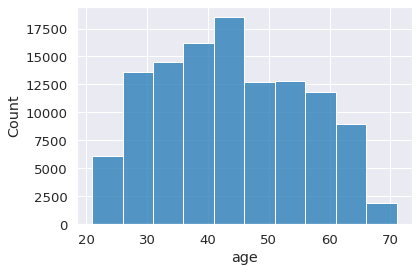

In [153]:
#Plot showing the distribution of age of the clients
sns.histplot(df['age'], binwidth=5)

The age of the clients, most of them belong in the age group of 40 - 45

In [154]:
#Frequecy table for occupation of the clients who took the automobile loan
df["client_occupation"].value_counts()

N/A                   39884
Laborers              20212
Sales                 11652
Core                  10171
Managers               7766
Drivers                6892
High skill tech        4152
Accountants            3614
Medicine               3050
Security               2570
Cooking                2144
Cleaning               1644
Private service         972
Low-skill Laborers      754
Secretaries             503
Waiters/barmen          490
Realty agents           270
HR                      198
IT                      187
Name: client_occupation, dtype: int64

We can see that the largest nember of the clients who took the automotive loan are labourers.These are people doing unskilled manual work for wages. This is possible because

Text(0.5, 1.0, 'countplot showing default rates')

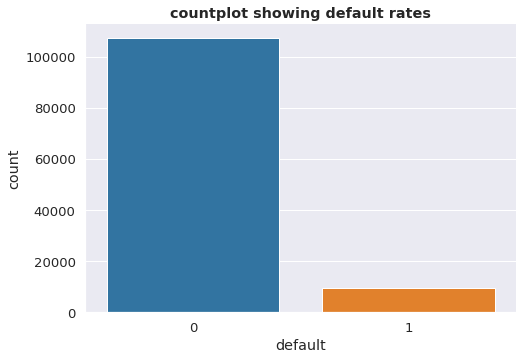

In [155]:
# countplot showing default rates 
#whether someone defaulted or not (1 means the client defaulted on loan payments and 0 means otherwise)
palette = ['blue','pink']
sns.catplot(x='default',data=df,kind='count',aspect=1.5)
sns.set_palette(palette)
plt.title('countplot showing default rates',weight='bold')

Majority of the people who took the automotive loan did not default

In [156]:
#Frequecy table for the level of education of the clients who took the automobile loan
df["client_education"].value_counts()

Secondary             84099
Graduation            27759
Graduation dropout     3805
Junior secondary       1400
Post Grad                62
Name: client_education, dtype: int64

This shows the Highest level of education achieved by client. Majority of the clients who took the loan are those whose highest level of education is secondary.

In [157]:
#Frequecy table for income type of the clients who took the automobile loan
df["client_income_type"].value_counts()

Service            62260
Commercial         26722
Retired            20132
Govt Job            7994
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: client_income_type, dtype: int64

Most of the clients who took the loan are in service.

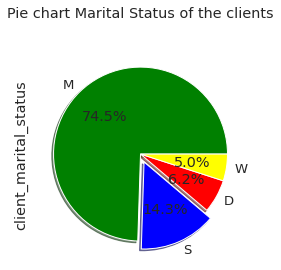

In [158]:
#pie chart for marital status
#This shows Marital status of client (D- Divorced, S- Single, M- Married, W- Widowed)
df["client_marital_status"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0,0), colors=['green',"blue","red","yellow"], autopct='%1.1f%%')
plt.title("Pie chart Marital Status of the clients", y=1.1)
plt.show()

73% of the clients who took the loan are maried while 5.1% which is the least number of clients are widowed

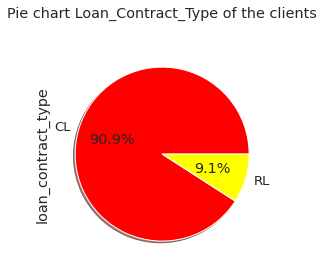

In [159]:
#pie chart for Loan_Contract_Type
#This shows Loan Type (CL- Cash Loan, RL- Revolving Loan)
df["loan_contract_type"].value_counts().plot(kind='pie',shadow = True,explode=(0,0), colors=["red","yellow"], autopct='%1.1f%%')
plt.title("Pie chart Loan_Contract_Type of the clients", y=1.1)
plt.show()

Majority of the clients took a cash loan for a loan contract

Text(0.5, 1.0, 'Number of house wowned by the client')

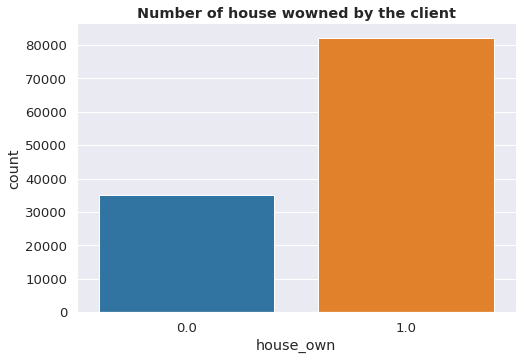

In [160]:
#Catplot to show Any house owned by client (0 means No and 1 means otherwise)
import seaborn as sns
sns.catplot(x='house_own',data=df,kind='count',aspect=1.5, palette = ("tab10"))
plt.title('Number of house wowned by the client',weight='bold')

From the analysis, the largest percentage of the clients who applied for the automotive loans have home ownership

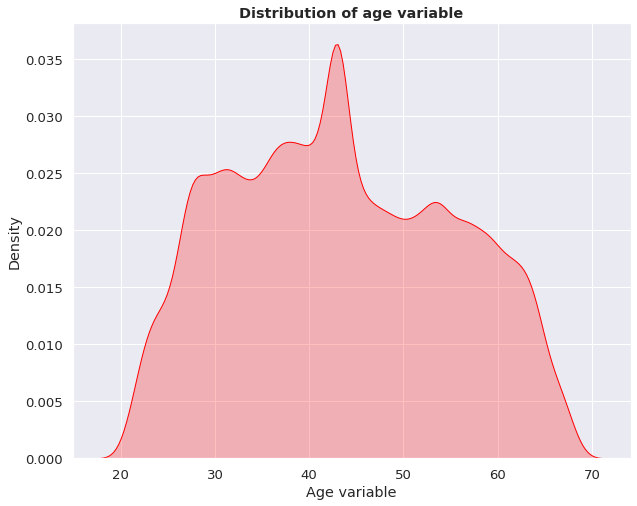

In [161]:
#plot showing distributions of ages (Age of the client at the time of application submission)
f, ax = plt.subplots(figsize=(10,8))
x = df["age"]
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable",weight='bold')
plt.show()

From the subplot, we can see that most the people who appried for the automotive loan were from the age group of 40-45 yeears.

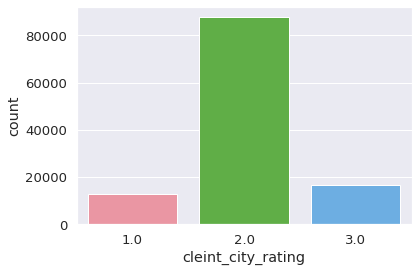

In [162]:
#plot to show distribution of clients in different cities
#Client city rating. 3 denotes best and 2 denotes good and 1 denotes average
sns.countplot(df['cleint_city_rating'])

Most of the loan accounts are to clients from level 2 cities(Client city rating. 3 denotes best and 2 denotes good and 1 denotes average)

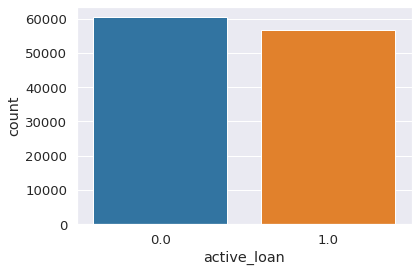

In [164]:
#Plot to show if a client has an existing loan or not
#Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
sns.countplot(df['active_loan'],palette = ("tab10"))

This denotes any other active loan at the time of aplication of loan (0 means No and 1 means otherwise). That means most of the loan applicants did not have an existing loan.

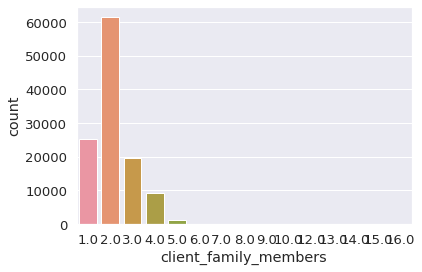

In [165]:
#plot to show the Number of family members  does client have
#Number of family members does client have

sns.countplot(df['client_family_members'])

Most of the clients who applied for the automotive loan had 2 to 3 family members

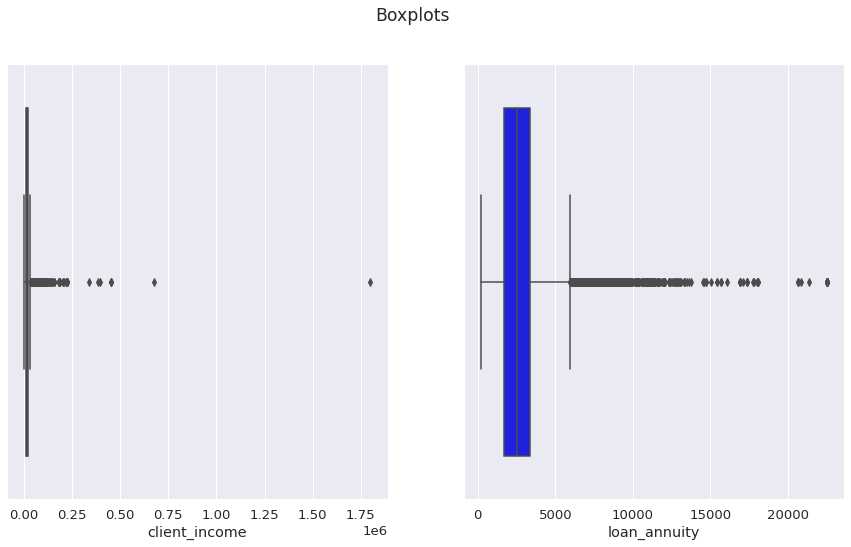

In [166]:
#Box plot
# Checking for outliers in the client income and loan annuity
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['client_income'], ax=axes[0])
sns.boxplot(df['loan_annuity'], ax=axes[1])
plt.show()

Income is a major detaminant of whether a client will be granted a loan or not.From our dataset, we are dealing with people from diverse fields with different salary range. We shall not drop the outliers since its is possible to get a client with an income more than 1 million

For loan annuity, different clients took different amounts of loan. Annuity due payment will be different.

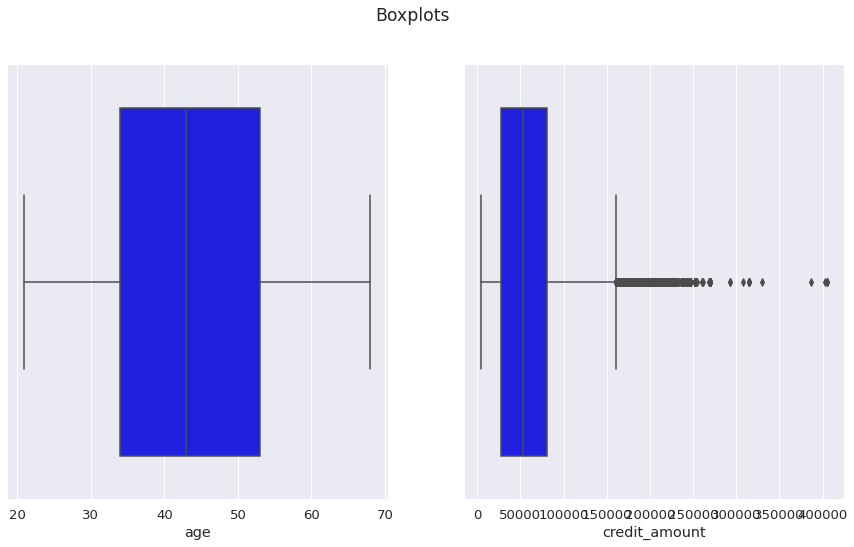

In [167]:
# Checking for outliers in the age and credit amount
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['credit_amount'], ax=axes[1])
plt.show()

The credit amount is different based on the different amount of loan taken by the client

# B) Bivariate Analysis

Text(0.5, 1.0, 'Default rate distribution with gender')

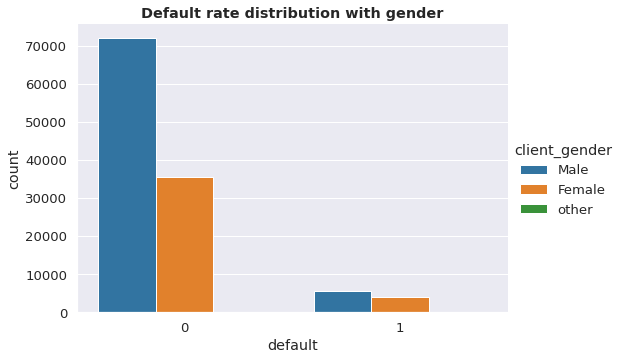

In [168]:
#To determine if the gender of the applicant affects the default rate
#(1 means the client defaulted on loan payments and 0 means otherwise)
sns.catplot(x='default',hue='client_gender',data=df,kind='count',aspect=1.5,palette = ("tab10"))
plt.title('Default rate distribution with gender',weight='bold')

From the graph we can see that most of the people who applied for the loan are male, female applicants were few. 
Male applicants had the highest default rate while female applicants had a lower default rate compared to male applicants.

Text(0.5, 1.0, 'Default rate distribution with client occupation')

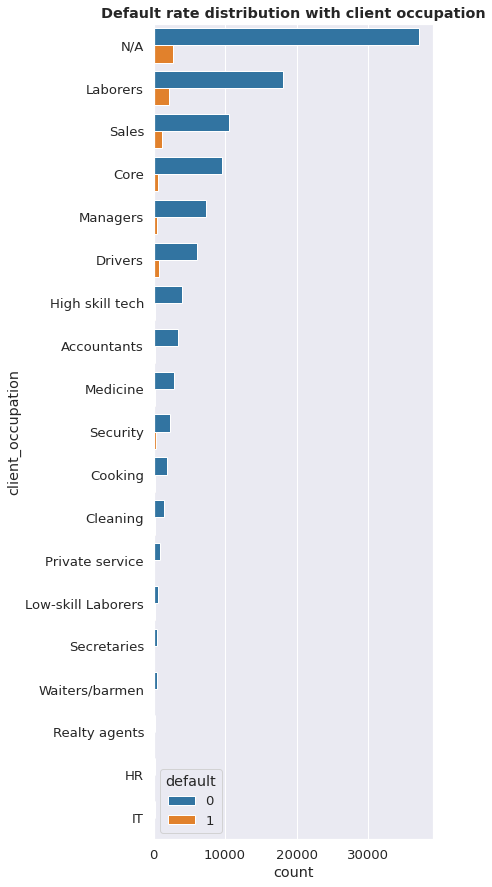

In [169]:
#To find out how the occupation of the applicant affects the default rate
#(1 means the client defaulted on loan payments and 0 means otherwise)
plt.figure(figsize=(5, 15))
sns.countplot(y = df["client_occupation"], order= df.client_occupation.value_counts().index, hue = df["default"],palette = ("tab10"))
plt.title('Default rate distribution with client occupation',weight='bold')

Majority of the people who defaulted the loan did not indicate their occupation followed by labourers

Text(0.5, 1.0, 'Default rate distribution with age')

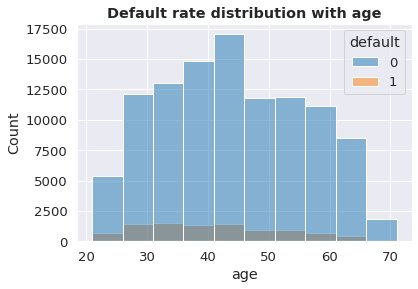

In [170]:
#To determine if the age of the applicant affects the default rate
sns.histplot(data=df, x='age', hue='default',binwidth=5, palette = ("tab10"))
plt.title('Default rate distribution with age',weight='bold')

Most of the defaulters were are between the ages of 30 and 35

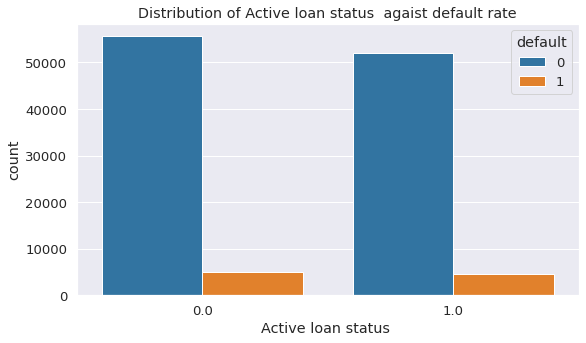

In [171]:
#To determine if having different loans affects the default rate
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='active_loan',hue='default',palette = ("tab10"))
plt.xlabel('Active loan status ')
plt.ylabel('count')
plt.title('Distribution of Active loan status  agaist default rate') 
plt.show()

Clients who have a different loan are more likely to default compared to those who do not

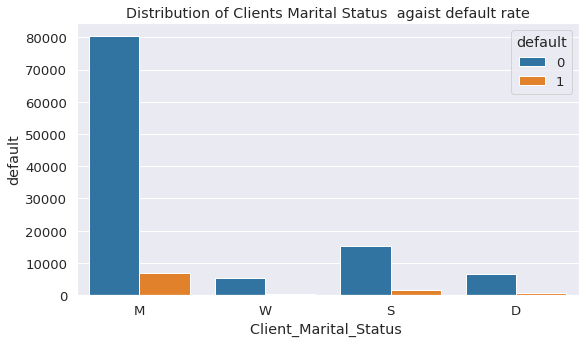

In [172]:
#To determine if the marital status of the applicant affects the default rate
#Stacked column chart for Client_Marital_Status  agaist default rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["client_marital_status"], hue = df["default"],palette = ("tab10"))
plt.xlabel('Client_Marital_Status ')
plt.ylabel('default')
plt.title('Distribution of Clients Marital Status  agaist default rate') 
plt.show()

Clients who are married are more likely to take and to default on the loan

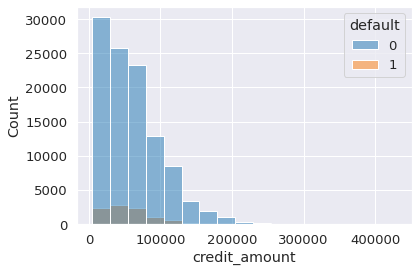

In [173]:
#To determine if the amount borrowed affects the applicant's ability to repay
sns.histplot(x= df['credit_amount'], hue = df['default'],binwidth=25000,palette = ("tab10"))

Clients who borrow between 25000 and 50000 are the most likely to default

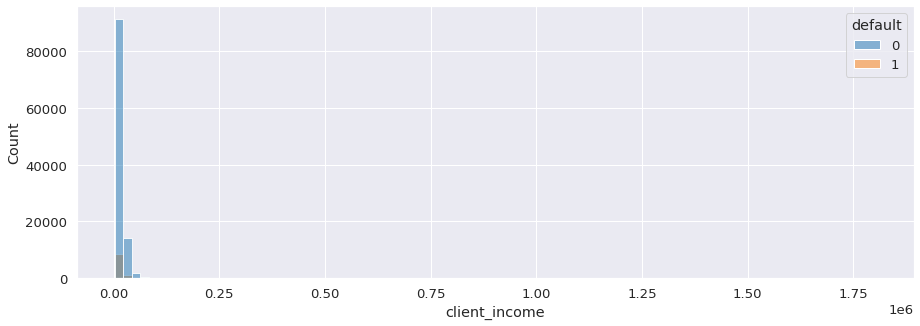

In [174]:
#To determine if the income of the applicant affects the default rate
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='client_income', hue='default',binwidth=20000,palette = ("tab10"))


Clients with lower income (betrween 0 and 20000) are most likely to default

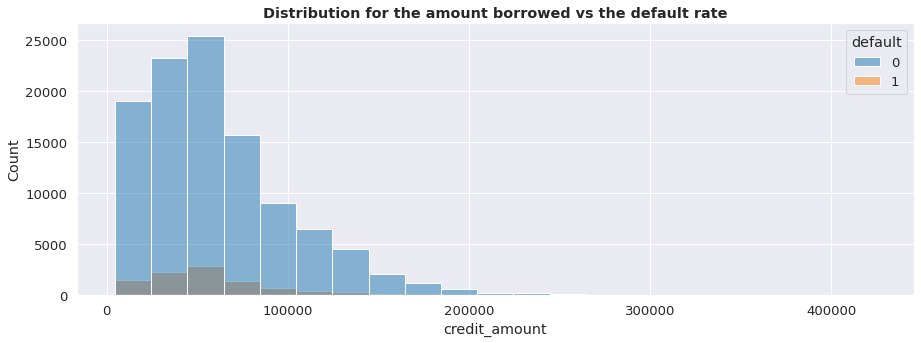

In [175]:
#To determine if the amount borrowed affects the applicant's ability to repay
# Line graph for the amount borrowed vs the default rate
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='credit_amount', hue='default',binwidth=20000,palette = ("tab10"))
plt.title("Distribution for the amount borrowed vs the default rate", fontweight='bold')
plt.show()

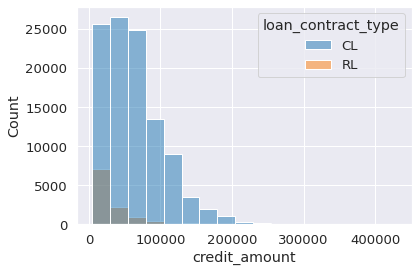

In [176]:
#To determine the relationship between the contract type of the loan and  the loan amount 
sns.histplot( x = df['credit_amount'],hue = df['loan_contract_type'],binwidth=25000,palette = ("tab10"))

* Rolling contracts are more likely between 0 to 25000
* Cash loans are more likely between 25000 to 50000

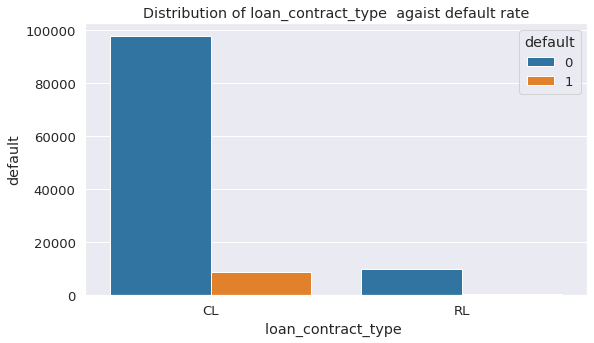

In [177]:
#To determine if the loan_contract_type of the applicant affects the default rate
#Stacked column chart for loan_contract_type  agaist default rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["loan_contract_type"], hue = df["default"],palette = ("tab10"))
plt.xlabel('loan_contract_type ')
plt.ylabel('default')
plt.title('Distribution of loan_contract_type  agaist default rate') 
plt.show()

In [178]:
#Clients taking cash loans are more likely to default

In [179]:
#correlation
df.corr()

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,population_region_relative,age_days,employed_days,registration_days,id_days,mobile_tag,homephone_tag,workphone_working,client_family_members,cleint_city_rating,application_process_day,application_process_hour,score_source_2,phone_change,credit_bureau,default,age
client_income,1.000000,0.165882,-0.004195,0.002195,0.004081,0.024997,0.315572,0.388145,0.002205,-0.050444,-0.127951,-0.055981,-0.022460,0.001094,-0.037905,0.003227,0.028459,-0.187904,-0.002813,0.075792,0.033677,0.040721,0.024369,-0.021615,-0.050459
car_owned,0.165882,1.000000,-0.000027,-0.000975,-0.007482,0.096436,0.109920,0.133863,-0.001652,-0.127004,-0.152576,-0.080792,-0.013998,-0.004137,0.011321,-0.008475,0.144234,-0.021593,-0.005540,0.014261,0.015425,0.034061,-0.033432,-0.022974,-0.126793
bike_owned,-0.004195,-0.000027,1.000000,0.001874,0.001329,0.002032,0.003836,-0.001349,0.005982,0.000164,-0.001045,-0.003658,0.000334,-0.004234,-0.003317,-0.007366,0.003004,0.001382,-0.002040,0.002067,0.001269,-0.003770,0.000272,-0.000880,0.000136
active_loan,0.002195,-0.000975,0.001874,1.000000,-0.006535,0.000520,0.000568,-0.000603,0.004439,0.000668,0.002776,-0.001100,0.000997,0.002829,0.000570,-0.001572,-0.001682,-0.003939,0.000348,0.004847,0.000920,0.007686,0.007578,-0.000350,0.000541
house_own,0.004081,-0.007482,0.001329,-0.006535,1.000000,-0.002508,-0.037660,-0.001847,0.002979,0.115290,0.066551,0.024406,-0.007199,-0.001906,-0.110165,-0.040177,0.007417,0.003356,0.011033,-0.100704,0.004681,-0.020621,0.060433,-0.000611,0.115274
child_count,0.024997,0.096436,0.002032,0.000520,-0.002508,1.000000,-0.000893,0.020720,-0.003256,-0.315273,-0.231255,-0.173384,0.023952,0.001647,0.051764,-0.028024,0.848897,0.024176,0.000352,-0.008910,-0.006063,0.009400,-0.033863,0.018826,-0.315195
credit_amount,0.315572,0.109920,0.003836,0.000568,-0.037660,-0.000893,1.000000,0.740771,-0.000339,0.052825,-0.062485,-0.007890,0.005015,0.002368,-0.021202,0.030903,0.057806,-0.108028,-0.004855,0.051500,0.028810,0.068031,-0.042938,-0.030393,0.052890
loan_annuity,0.388145,0.133863,-0.001349,-0.000603,-0.001847,0.020720,0.740771,1.000000,0.000650,-0.008770,-0.100128,-0.035418,-0.011218,0.000265,-0.026271,0.013802,0.070819,-0.137225,-0.000380,0.052983,0.025837,0.058876,-0.011610,-0.012136,-0.008705
population_region_relative,0.002205,-0.001652,0.005982,0.004439,0.002979,-0.003256,-0.000339,0.000650,1.000000,0.000578,-0.002102,0.001299,0.001890,0.000085,-0.002659,0.005087,-0.001590,-0.017305,0.000622,0.007962,0.001634,0.000441,-0.002228,-0.002367,0.000537
age_days,-0.050444,-0.127004,0.000164,0.000668,0.115290,-0.315273,0.052825,-0.008770,0.000578,1.000000,0.604551,0.320176,0.260969,0.005063,-0.168427,0.037227,-0.269430,-0.004244,0.010584,-0.088293,0.019904,0.077833,0.064813,-0.072512,0.999695


The table above shows how each variable relates to another.





# C) Multi-variate Analysis

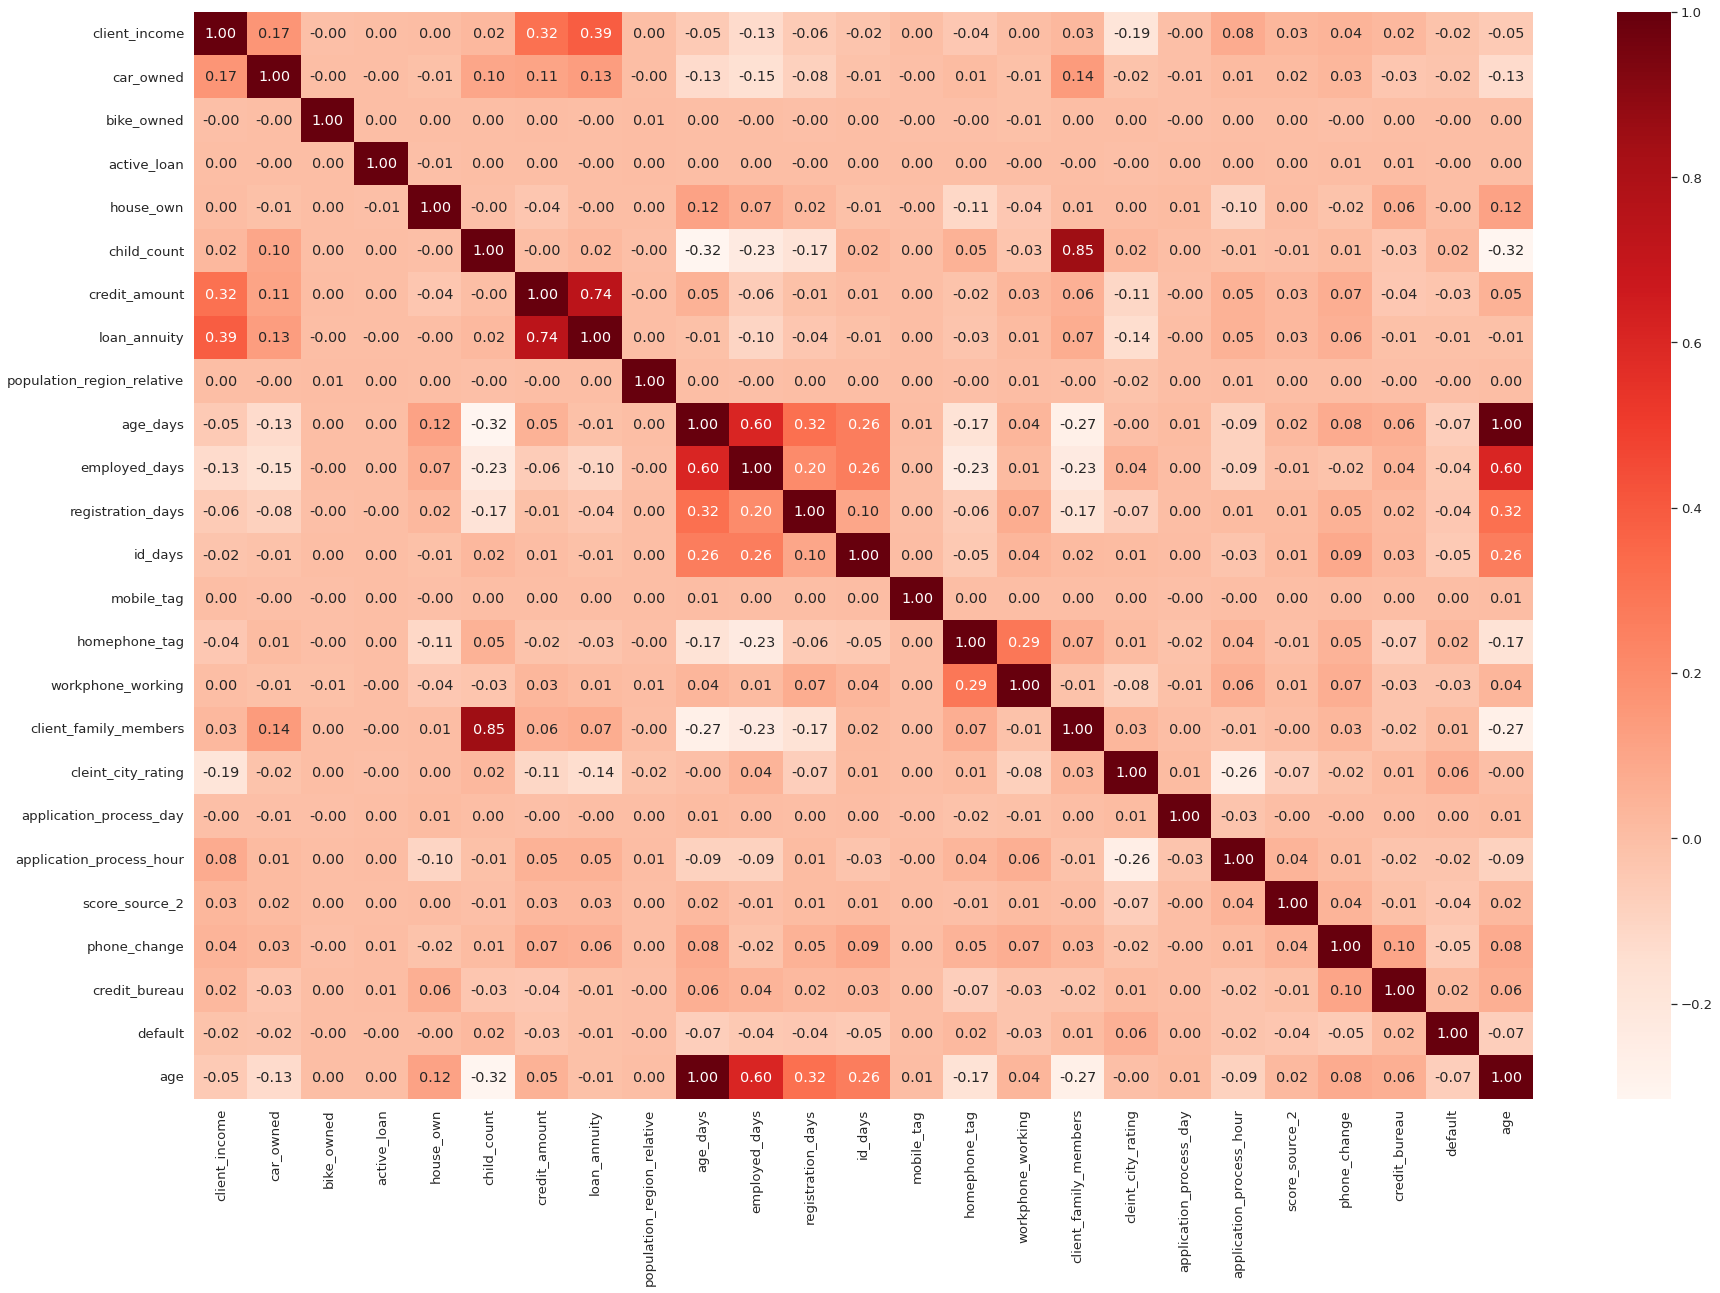

In [180]:
#Plotting a heat map to show correlation between the variables
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

The following are the standout correlations;

Coefficient of one accross the diagonal shows that a variable perfectly correlates to itself

There is a strong positive correlation(0.85) between child count and client family members

There is a string positive correlation (0.6) between age in days and employed days

There is a weak positive correlation (0.39) between client income and loan annuity

There is a weak positive correlation (0.32) between client income and credit amount

The other features have zero and weak correlations between each other

In [181]:
df.head(2)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,client_education,client_marital_status,client_gender,loan_contract_type,client_housing_type,population_region_relative,age_days,employed_days,registration_days,id_days,mobile_tag,homephone_tag,workphone_working,client_occupation,client_family_members,cleint_city_rating,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.891082,0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,1,0,1,N/A,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.891082,0,38


In [182]:
# FEATURE ENGINEERING
# 
#installing category encoder
!pip install category_encoders


In [183]:
# import category encoders
import category_encoders as ce

#These are the categorical columns that will be converted to numberical
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
for i in cateogry_columns:
  print('\n')
  print(train[i].unique())



['Alone' 'Relative' 'Others' 'Kids' 'Partner' 'Group']


['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']


['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']


['M' 'W' 'S' 'D']


['Male' 'Female' 'other']


['CL' 'RL']


['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']


['Sales' 'N/A' 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


['Yes' 'No']


['Yes' 'No']


['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' 'N/A'
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Indus

In [184]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)
df = encoder.fit_transform(df)
df.head(2)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,client_education,client_marital_status,client_gender,loan_contract_type,client_housing_type,population_region_relative,age_days,employed_days,registration_days,id_days,mobile_tag,homephone_tag,workphone_working,client_occupation,client_family_members,cleint_city_rating,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,1,1,1,1,1,1,0.028663,13957.0,1062.0,6123.0,383.0,1,1,0,1,2.0,2.0,6.0,17.0,1,1,1,0.478787,63.0,1.891082,0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,1,2,2,1,1,1,1,0.008575,14162.0,4129.0,7833.0,21.0,1,0,1,2,2.0,2.0,3.0,10.0,1,1,2,0.215068,0.0,1.891082,0,38


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117125 entries, 0 to 121855
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   client_income               117125 non-null  float64
 1   car_owned                   117125 non-null  float64
 2   bike_owned                  117125 non-null  float64
 3   active_loan                 117125 non-null  float64
 4   house_own                   117125 non-null  float64
 5   child_count                 117125 non-null  float64
 6   credit_amount               117125 non-null  float64
 7   loan_annuity                117125 non-null  float64
 8   accompany_client            117125 non-null  int64  
 9   client_income_type          117125 non-null  int64  
 10  client_education            117125 non-null  int64  
 11  client_marital_status       117125 non-null  int64  
 12  client_gender               117125 non-null  int64  
 13  loan_contract_

## 7. Implementing the Solution

## BuildIing the Models
We will use tree based models

 1. Decision Trees
 2. Random forests
 3. Ada boosted trees
 4. Gradient boosted trees.

We will optimize these models, identify the best amongst these models and use it to determine which features are most impactful in influencing the prediction.

We decided to use tree based models because our dataset is non-parametic and our classes are binary. The models will also help us determine the most important features.

### Decision tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Create a decision tree classifier

tree = DecisionTreeClassifier()
X = df.drop('default', axis = 1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8574200558832661


In [187]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[32477  3078]
 [ 2433   664]]


In [188]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     35555
           1       0.18      0.21      0.19      3097

    accuracy                           0.86     38652
   macro avg       0.55      0.56      0.56     38652
weighted avg       0.87      0.86      0.86     38652



The F1 score is a measure of the models precision and recall, it is important as accuracy is not always the most reliable measure for classification problem. As we can see from the cell above, the model is better at making accurate predictions of not defaulting and better recal of the same. In this case its best to get a model that perfoms these two the best 

### Random forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.924816309634689


The accuracy of random forest is about 92%

In [190]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[35555     0]
 [ 2906   191]]


In [191]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35555
           1       1.00      0.06      0.12      3097

    accuracy                           0.92     38652
   macro avg       0.96      0.53      0.54     38652
weighted avg       0.93      0.92      0.89     38652



The f1 score in this model has a better value for *not defaulting* in comparison with the previous one, however its score for *defaulting* is lower than the previous

### ADA boost and Gradient boost

In [192]:
# Importing the libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=0)
AdB_classifier.fit(X_train, y_train)

# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GBM_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [193]:
# Getting the predicted values
y_pred_AdB = AdB_classifier.predict(X_test)
y_pred_GBM = GBM_classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Ada Boost:",metrics.accuracy_score(y_test, y_pred_AdB))
print("Accuracy Gradient Boost:",metrics.accuracy_score(y_test, y_pred_GBM))

Accuracy RF: 0.924816309634689
Accuracy Ada Boost: 0.9194867018524268
Accuracy Gradient Boost: 0.9200041395011901


Random forest has the highest accuracy with ada boost having the lowest accuracy

In [194]:
# Model confusion matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_GBM))

Confusion matrix RF:
 [[35555     0]
 [ 2906   191]]
Confusion matrix Ada Boost:
 [[35530    25]
 [ 3087    10]]
Confusion matrix Gradient Boost:
 [[35545    10]
 [ 3082    15]]


In [195]:
# Model classification_report matrix , how often is the classifier correct?
print("classification_report RF:"'\n',metrics.classification_report(y_test, y_pred))
print("classification_report Ada Boost:"'\n',metrics.classification_report(y_test, y_pred_AdB))
print("classification_report Gradient Boost:"'\n',metrics.classification_report(y_test, y_pred_GBM))

classification_report RF:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35555
           1       1.00      0.06      0.12      3097

    accuracy                           0.92     38652
   macro avg       0.96      0.53      0.54     38652
weighted avg       0.93      0.92      0.89     38652

classification_report Ada Boost:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35555
           1       0.29      0.00      0.01      3097

    accuracy                           0.92     38652
   macro avg       0.60      0.50      0.48     38652
weighted avg       0.87      0.92      0.88     38652

classification_report Gradient Boost:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35555
           1       0.60      0.00      0.01      3097

    accuracy                           0.92     38652
   macro avg       0.76     

The accuracy is very high but it is due to the class imbalance as the default class is about 8% thus class rebalancing will be important to improve the f1 scores which are very low

## Resampling using oversampler

In [196]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.3)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

Chose oversampling to prevent information loss from the larger non default class

### Decision tree

In [197]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9153892878836603


The accuracy is higher compared to the non balanced decision tree (85% to 92%)

In [198]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[19457  2064]
 [  304  6162]]


In [199]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     21521
           1       0.75      0.95      0.84      6466

    accuracy                           0.92     27987
   macro avg       0.87      0.93      0.89     27987
weighted avg       0.93      0.92      0.92     27987



The decision model has f1 score of .95 for *not defaulting* and .85 for. This is an improvement compared to the default class f1 score(s).

### Random forest

In [200]:
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9871726158573624


The accuracy of the random forest classifier improved to about 98%

In [201]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[21513     8]
 [  351  6115]]


In [202]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))
#The f1 score in this case is an improvement of the previous model, improvinf on both classes of classififcation 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21521
           1       1.00      0.95      0.97      6466

    accuracy                           0.99     27987
   macro avg       0.99      0.97      0.98     27987
weighted avg       0.99      0.99      0.99     27987



The overall f1 score has improved to .98 with f1 for default class improving to .97

### ADA boost and Gradient boost

In [203]:
# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=0)
AdB_classifier.fit(X_train, y_train)

# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GBM_classifier.fit(X_train, y_train)

# Getting the predicted values
y_pred_AdB = AdB_classifier.predict(X_test)
y_pred_GBM = GBM_classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Ada Boost:",metrics.accuracy_score(y_test, y_pred_AdB))
print("Accuracy Gradient Boost:",metrics.accuracy_score(y_test, y_pred_GBM))

Accuracy RF: 0.9871726158573624
Accuracy Ada Boost: 0.7739307535641547
Accuracy Gradient Boost: 0.7771822631936256


* The accuracy for random forest classifier improved to .98 from .92
* The accuracy for ADA boost classifier reduced to .91 from .77
* The accuracy for Gradient boost classifier reduced to .92 from .77

In [204]:
# Model confusion matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_GBM))

Confusion matrix RF:
 [[21513     8]
 [  351  6115]]
Confusion matrix Ada Boost:
 [[20982   539]
 [ 5788   678]]
Confusion matrix Gradient Boost:
 [[21123   398]
 [ 5838   628]]


In [205]:
# Model classification_report matrix , how often is the classifier correct?
print("classification_report RF:"'\n',metrics.classification_report(y_test, y_pred))
print("classification_report Ada Boost:"'\n',metrics.classification_report(y_test, y_pred_AdB))
print("classification_report Gradient Boost:"'\n',metrics.classification_report(y_test, y_pred_GBM))

classification_report RF:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21521
           1       1.00      0.95      0.97      6466

    accuracy                           0.99     27987
   macro avg       0.99      0.97      0.98     27987
weighted avg       0.99      0.99      0.99     27987

classification_report Ada Boost:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87     21521
           1       0.56      0.10      0.18      6466

    accuracy                           0.77     27987
   macro avg       0.67      0.54      0.52     27987
weighted avg       0.73      0.77      0.71     27987

classification_report Gradient Boost:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87     21521
           1       0.61      0.10      0.17      6466

    accuracy                           0.78     27987
   macro avg       0.70     

* From the results of the f1 score the random forest classifier performed the best
* The f1 score for the default class improved from .01 to .19 for ADA boost on class rebalancing
* The f1 score for the default class improved from .01 to .18 for Gradient boost on class rebalancing

## Getting most important features

In [206]:
# Getting the important features
Important_features  = rand_forest.feature_importances_

In [207]:
# Creating a dataframe of feature names and features importances
FIM = pd.DataFrame({'Features': X.columns 
                   , 'Feature_importance':Important_features})
FIM = FIM.sort_values(by=['Feature_importance'],ascending=False)
FIM

,Features,Feature_importance
31,score_source_2,1.005430e-01
19,id_days,6.362669e-02
18,registration_days,6.302064e-02
17,employed_days,6.232058e-02
16,age_days,6.072837e-02
7,loan_annuity,6.057747e-02
6,credit_amount,5.851175e-02
32,phone_change,5.835160e-02
15,population_region_relative,4.932837e-02
0,client_income,4.675069e-02


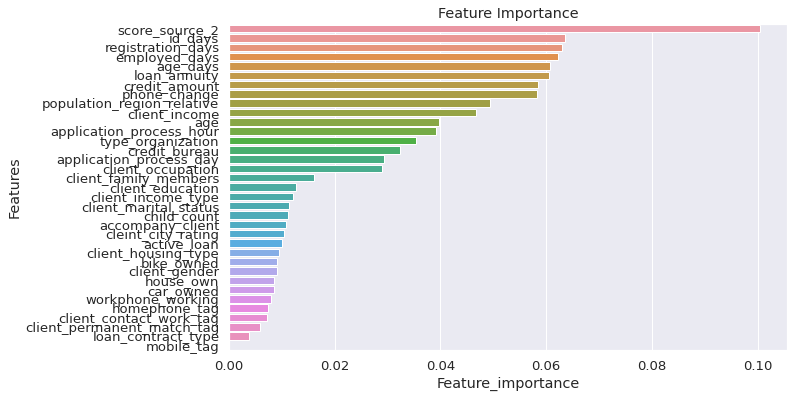

In [208]:
# Plotting features by importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

The most important feature for classification was score source 2 for determining if a client defaulted or not

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [209]:
# Reviewing the Solution 
#
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [2,5],
    'min_samples_split': [2, 5],
    'n_estimators': [10, 50]}

In [210]:
# Creating the grid for tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid= param_grid, refit = True, verbose=2, cv=5 )

# Fitting the hyperparameter grid to the train set
grid.fit(X_train,y_train)

# Getting the best parameters
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.6s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.7s
[CV] END bootstrap

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Getting the predictions
y_pred_optimized = grid.predict(X_test)

# Getting the confusion metrics
print(metrics.confusion_matrix(y_test, y_pred_optimized))

In [ ]:
# Getting the classifiction report
print(metrics.classification_report(y_test, y_pred_optimized))


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Our data was more skewed towards accounts where the customers did not default on their loans, data that would be more nominally distributed would be better in training a supervised model for prediction 

### b). Do we need other data to answer our question?

In addition to the data, we have currently more examples/entries of defaulting customers would only improve the model’s real-life prediction capabilitiess 

### c). Did we have the right question?

We do have the right question, but we could rephrase it to... Can we predict which client will default on their loan using a series of descriptors 